### Problem statement

In the highly competitive telecom industry, where customers frequently switch service providers, the average annual churn rate is around 10%. Given that it is 5-10 times more costly to acquire a new customer than to retain an existing one, customer retention has become a top priority for telecom companies, especially when it comes to retaining highly profitable customers.
The goal of this project is to analyze customer-level data from a leading telecom firm and build predictive models to identify customers who are at high risk of churning. By predicting which customers are likely to leave, telecom companies can take proactive measures to retain them and reduce churn.

###### Objectives

Help No-Churn with their use cases with ML
1. Understanding the variables that are influencing the customers to migrate.
2. Creating Churn risk scores that can be indicative to drive retention campaigns.
3. Introduce new predicting variable “CHURN-FLAG” with values YES(1) or NO(0) so that email campaigns with lucrative offers can be targeted to Churn YES customers.


In this project, we're tackling a classification problem focused on predicting customer churn. Our objective is to build a model that can effectively distinguish between customers who are likely to churn and those who will remain loyal.

In [ ]:
# readiness the Database connection

In [ ]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


#### Importing Libraries

In [ ]:
#basic
import numpy as np
import pandas as pd

#sql
import mysql.connector

#visaualisation
import matplotlib.pyplot as plt
import seaborn as sns

#data processing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

#model selection
from sklearn.model_selection import train_test_split

#model development
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score
from sklearn.metrics import recall_score, make_scorer, confusion_matrix, roc_auc_score

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#deployment
import pickle

#warnings
import warnings
warnings.filterwarnings('ignore')



#### Importing Data

In [ ]:
pip install PyMySQL

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pymysql
print("PyMySQL is installed and working!")

PyMySQL is installed and working!


In [ ]:
import mysql.connector

# Establish the connection
Myconnection = mysql.connector.connect(
    host='18.136.157.135',
    user='dm_team3',  # Use 'user' instead of 'username'
    password='DM!$!Team!27@9!20&',  # Ensure the password is correct
    database='project_telecom'
)

# Check if the connection is successful
if Myconnection.is_connected():
    print("Connected to the database successfully")
else:
    print("Failed to connect to the database")

Connected to the database successfully


In [ ]:
from collections import defaultdict

###### Load Data from the Database

In [ ]:
# Query to select all data from the telecom_churn_data table
query = "SELECT * FROM telecom_churn_data"

In [ ]:
# Load the data into a Pandas DataFrame
df = pd.read_sql(query,Myconnection)

In [ ]:
# Display the first few rows of the dataset
print(df.head())

  columns1 columns2 columns3   columns4 columns5 columns6 columns7 columns8  \
0       KS      128      415   382-4657       no      yes       25    265.1   
1       OH      107      415   371-7191       no      yes       26    161.6   
2       NJ      137      415   358-1921       no       no        0    243.4   
3       OH       84      408   375-9999      yes       no        0    299.4   
4       OK       75      415   330-6626      yes       no        0    166.7   

  columns9 columns10  ... columns12 columns13 columns14 columns15 columns16  \
0      110     45.07  ...        99     16.78     244.7        91     11.01   
1      123     27.47  ...       103     16.62     254.4       103     11.45   
2      114     41.38  ...       110      10.3     162.6       104      7.32   
3       71      50.9  ...        88      5.26     196.9        89      8.86   
4      113     28.34  ...       122     12.61     186.9       121      8.41   

  columns17 columns18 columns19 columns20 columns2

**Renaming columns into readable names**

In [ ]:
df.columns.tolist()

['columns1',
 'columns2',
 'columns3',
 'columns4',
 'columns5',
 'columns6',
 'columns7',
 'columns8',
 'columns9',
 'columns10',
 'columns11',
 'columns12',
 'columns13',
 'columns14',
 'columns15',
 'columns16',
 'columns17',
 'columns18',
 'columns19',
 'columns20',
 'columns21']

In [ ]:
new_column_names = ['State','Account_Length','Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_Calls','Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins','International_calls','International_Charge','CustServ_Calls','CHURN-FLAG']

In [ ]:
df.columns=new_column_names

In [ ]:
df

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,CHURN-FLAG
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


#### Basic checks

In [ ]:
df.dtypes.unique()

array([dtype('O')], dtype=object)

* Above reflects all the datatypes represent as 'object' datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International_Plan    4617 non-null   object
 5   VMail_Plan            4617 non-null   object
 6   VMail_Message         4617 non-null   object
 7   Day_Mins              4617 non-null   object
 8   Day_Calls             4617 non-null   object
 9   Day_Charge            4617 non-null   object
 10  Eve_Mins              4617 non-null   object
 11  Eve_Calls             4617 non-null   object
 12  Eve_Charge            4617 non-null   object
 13  Night_Mins            4617 non-null   object
 14  Night_Calls           4617 non-null   object
 15  Night_Charge          4617 non-null   

In [ ]:
#statistical Summary
df.describe()

,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,CHURN-FLAG
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [ ]:
df.shape

(4617, 21)

In [ ]:
for column in df.columns:
    print(f"Unique values for column '{column}':")
    print(df[column].unique())
    print()

Unique values for column 'State':
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

Unique values for column 'Account_Length':
['128' '107' '137' '84' '75' '118' '121' '147' '117' '141' '65' '74' '168'
 '95' '62' '161' '85' '93' '76' '73' '77' '130' '111' '132' '174' '57'
 '54' '20' '49' '142' '172' '12' '72' '36' '78' '136' '149' '98' '135'
 '34' '160' '64' '59' '119' '97' '52' '60' '10' '96' '87' '81' '68' '125'
 '116' '38' '40' '43' '113' '126' '150' '138' '162' '90' '50' '82' '144'
 '46' '70' '55' '106' '94' '155' '80' '104' '99' '120' '108' '122' '157'
 '103' '63' '112' '41' '193' '61' '92' '131' '163' '91' '127' '110' '140'
 '83' '145' '56' '151' '139' '6' '115' '146' '185' '148' '32' '25' '179'
 '67' '19' '170' '164' '51' '208' '53' '105' '66' '86' '35' '88' '123'
 '45' '

* Unique values for column 'International_Plan':[' no' ' yes']
* Unique values for column 'VMail_Plan':[' no' ' yes']
* Unique values for column 'CHURN-FLAG':  [' False.' ' True.']        

In [ ]:
# Convert categorical variables to numeric
# Define the mapping dictionary
mapping = {' yes' : 1, ' no': 0}
mapping2={' True.':1,' False.':0}

df['International_Plan'] = df['International_Plan'].replace(mapping)
df['VMail_Plan'] = df['VMail_Plan'].replace(mapping)
df['CHURN-FLAG'] = df['CHURN-FLAG'].replace(mapping2)

In [ ]:
df.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'CHURN-FLAG'],
      dtype='object')

In [ ]:
# Dictionary of columns to convert
columns_to_convert_int = {col: 'int64' for col in [
    'Account_Length', 'Area_Code', 'CustServ_Calls', 'International_calls',
    'Night_Calls', 'Day_Calls', 'Eve_Calls', 'VMail_Message'
]}
columns_to_convert_float = {col: 'float' for col in [
    'International_Charge', 'International_Mins', 'Night_Mins', 'Night_Charge',
    'Day_Charge', 'Eve_Mins', 'Eve_Charge'
]}

# Combine dictionaries
columns_to_convert = {**columns_to_convert_int, **columns_to_convert_float}

# Convert columns to the specified data types
df = df.astype(columns_to_convert)

# Check the new data types
print(df.dtypes)

State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_Plan        int64
VMail_Plan                int64
VMail_Message             int64
Day_Mins                 object
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_calls       int64
International_Charge    float64
CustServ_Calls            int64
CHURN-FLAG                int64
dtype: object


#### Exploratory Data Analysis

In [ ]:
import sweetviz as sv
report=sv.analyze(df)
report.show_html('my_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* The account_length column has a minimum value of 1 and a maximum value of 243.
* The vmail_message column has a minimum value of 0 and a maximum value of 51. On an average, customers sent around 8 voice mail messages.
* Customers made around 100 calls on an average during day, evening and night which made dataset balanced in that respect.
* On an average, customers talked on 180.44 mins during the day, 200.42 mins during evening, and 200.62 mins during night. This means customers tend to spend more time talking during evening and night than day.
* The average calling charges for evening (17) and night
(9) is much lower that day($30).
* Average international calling charge is around $3 which is signifantly lesser.
* Customers spend around 10 mins on international calls. Average international calling charge is around $3 which is significantly lesser.
* There are some customers who make very long calls during the day and even thought they have to pay high charges.
* The international_mins column has a maximum value of 20, which suggests that there might be some outliers or high-value customers in this category.
* The custServ_calls column has a maximum value of 9, which indicates that some customers had to contact customer service multiple times, and it might be interesting to explore why they had to do so.

* Univariate Analysis

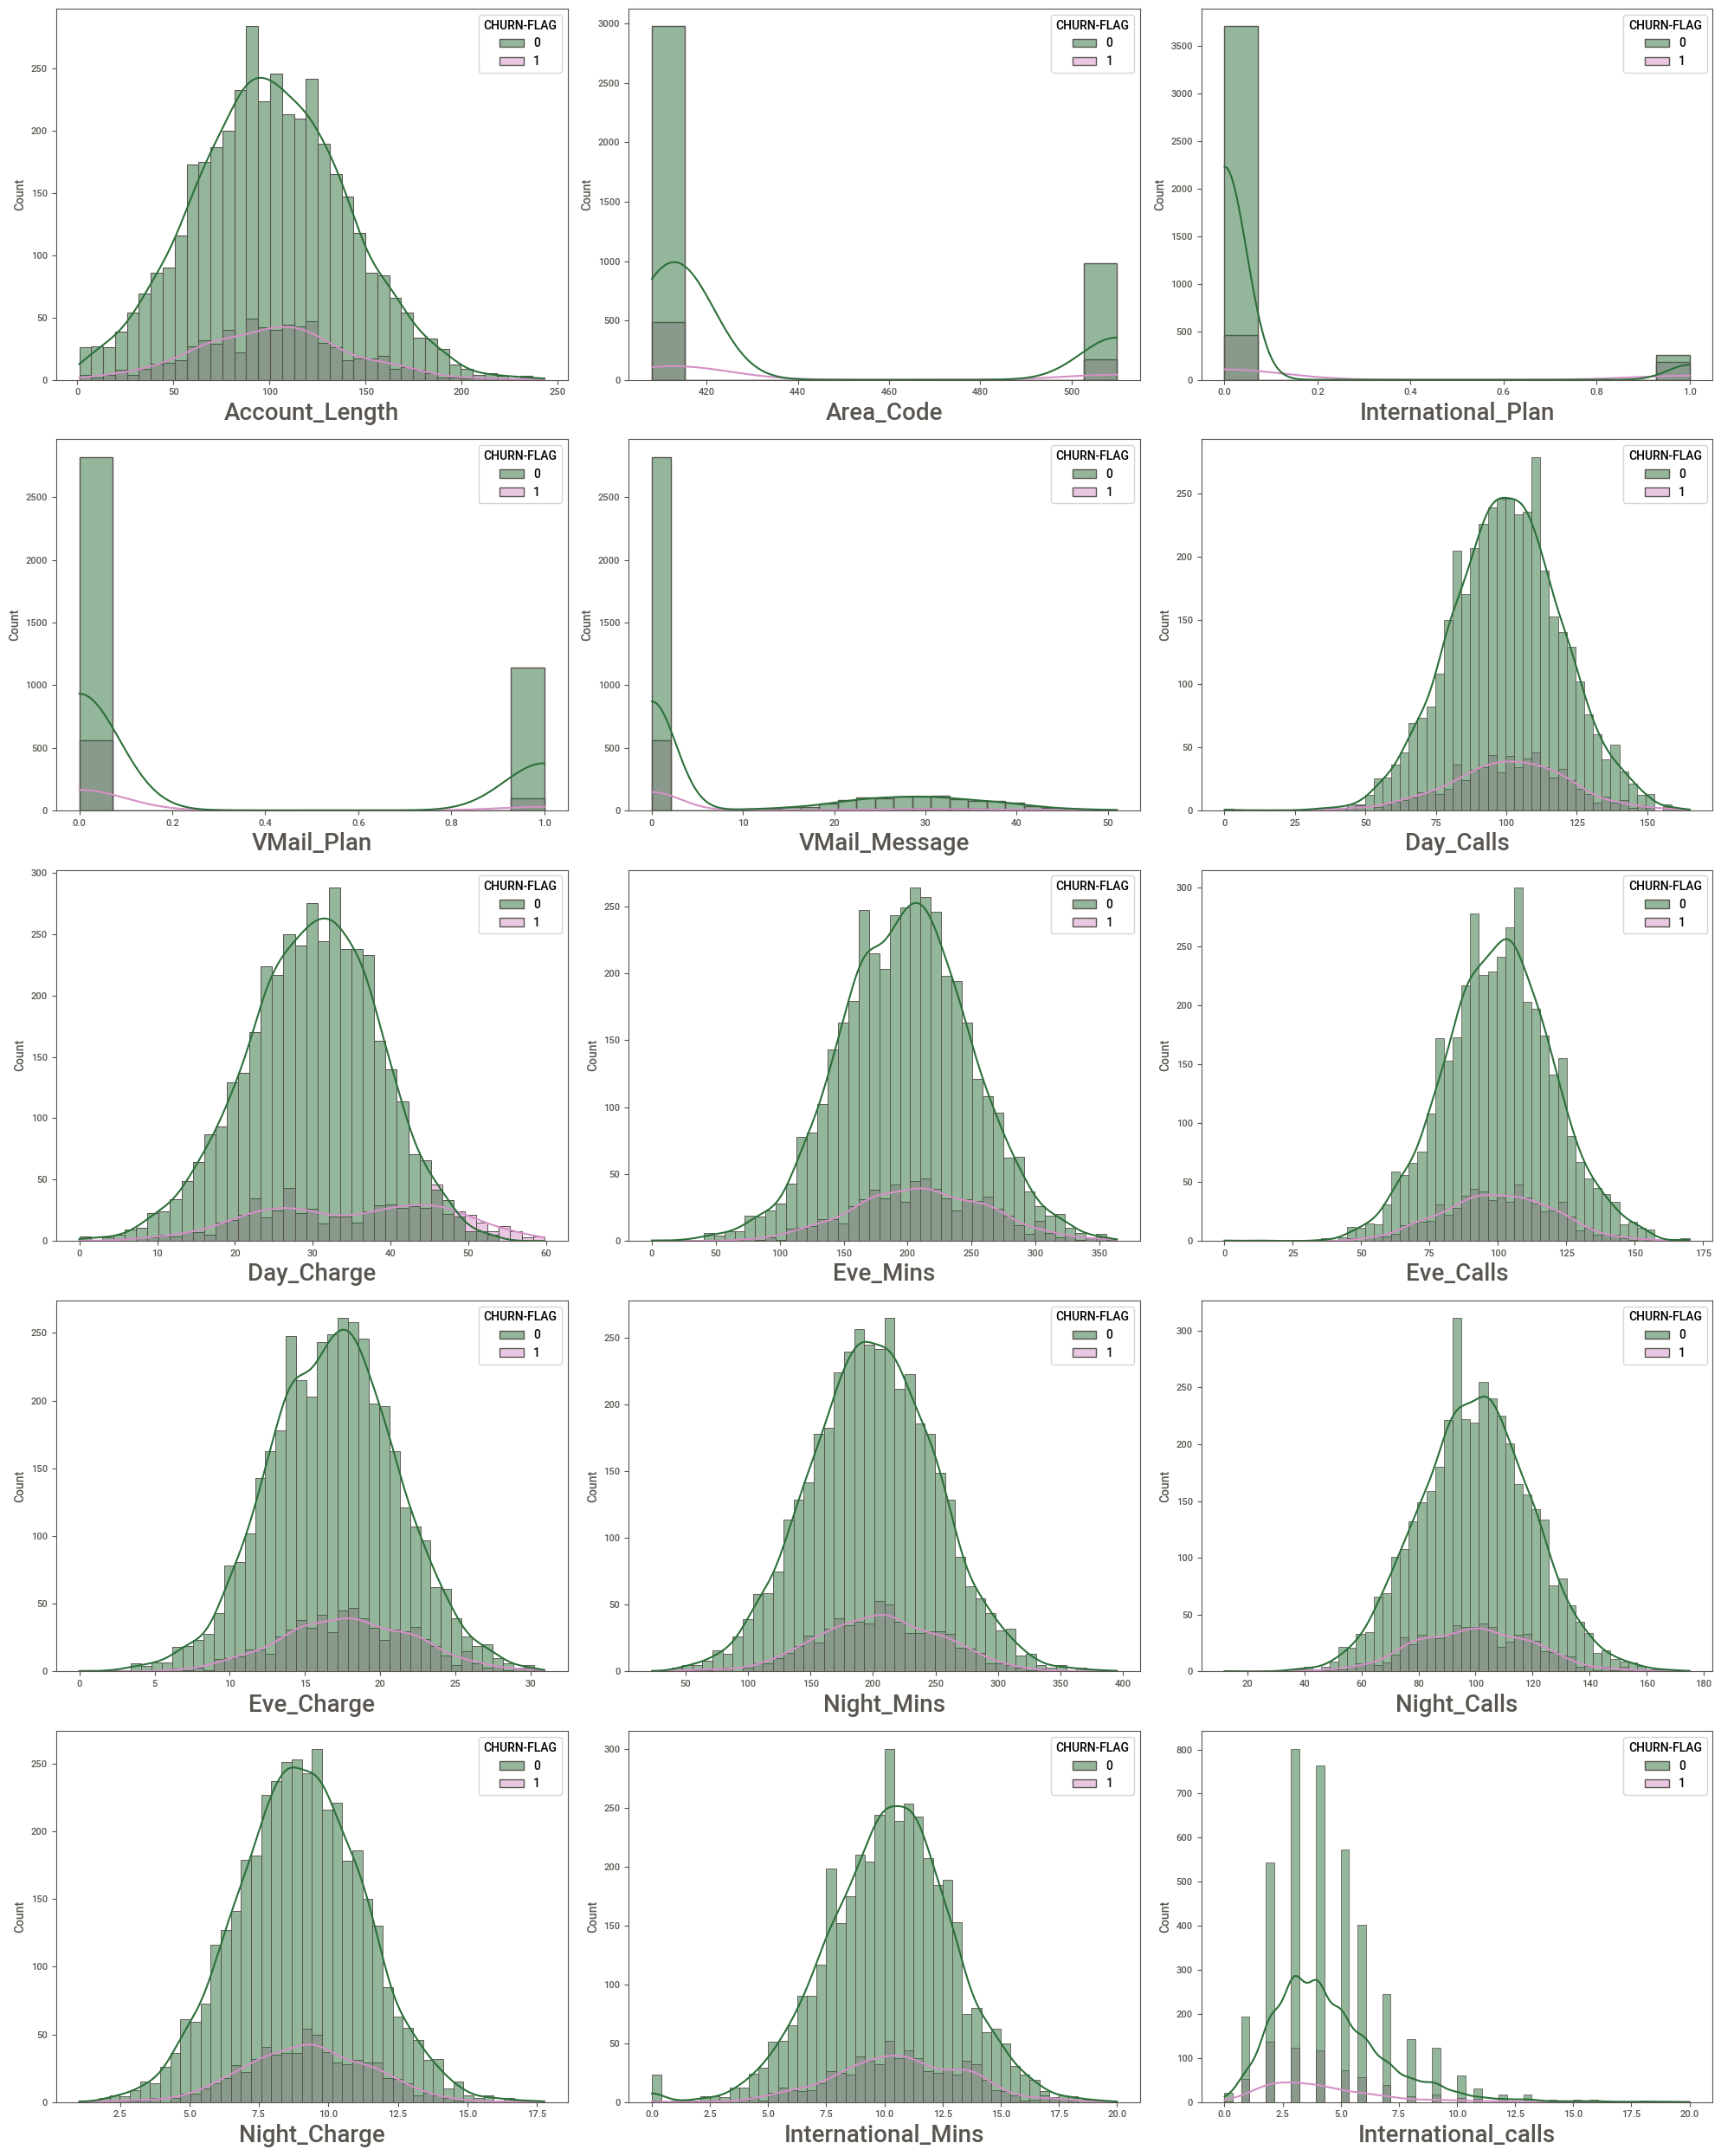

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(['int','float']).columns:
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x=df[column], hue=df['CHURN-FLAG'], kde=True,palette='cubehelix')
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.tight_layout()


* Most of the numerical columns exhibit a normal distribution.
* A significant number of customers have opted out of the voice mail plan, resulting in a large portion of customers who have not sent any voice mail messages.
* The distribution of international calls and customer service calls shows a slight right skew.

###### Churned & Not churned

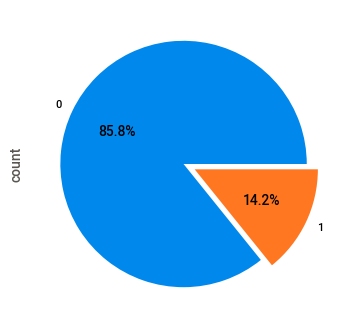

In [ ]:
# number of customers who churned and who did not churn
plt.figure(figsize=(6,4))
labels = ['not churn', 'Churned']
df['CHURN-FLAG'].value_counts().plot.pie(autopct='%1.1f%%', explode=([0,0.1]))
plt.show()

###### Account Length & International Plan

<Axes: xlabel='CHURN-FLAG', ylabel='Account_Length'>

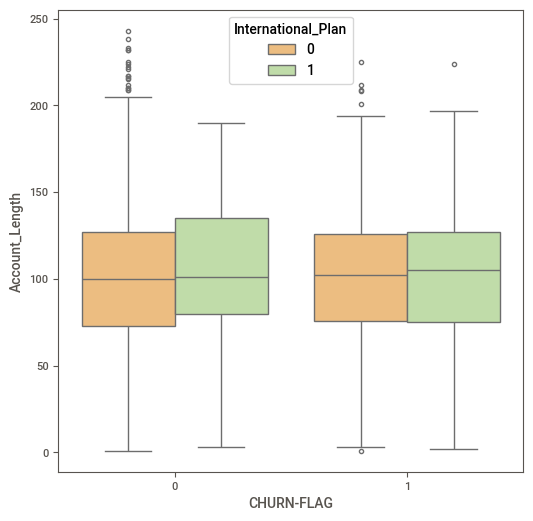

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='CHURN-FLAG', y='Account_Length', hue='International_Plan', data=df, palette='Spectral')

* The plot helps to determine if the "International Plan" feature influences account length or customer churn.
* The four boxplots appear nearly aligned and are of similar size, with only a small difference between their median values.
* This suggests that having an international plan does not significantly affect the likelihood of customer churn, making it a less important factor for predicting churn.

###### CustServ_Calls and VMail_Plan

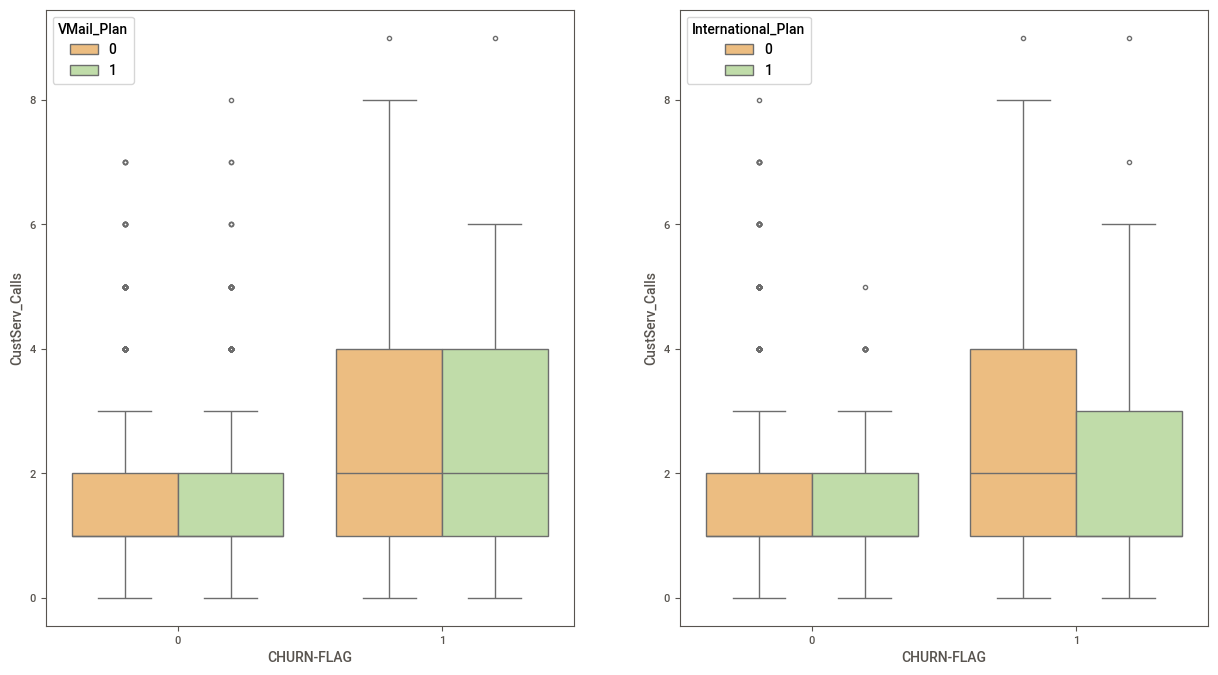

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'CHURN-FLAG', y = 'CustServ_Calls', hue='VMail_Plan', data = df, palette='Spectral');

plt.subplot(1,2,2)
sns.boxplot(x = 'CHURN-FLAG', y = 'CustServ_Calls', hue='International_Plan', data = df, palette='Spectral');


* It appears that customers who churn tend to make more customer service calls. However, if these churned customers also have an international plan, they tend to make fewer customer service calls.

##### Count plots

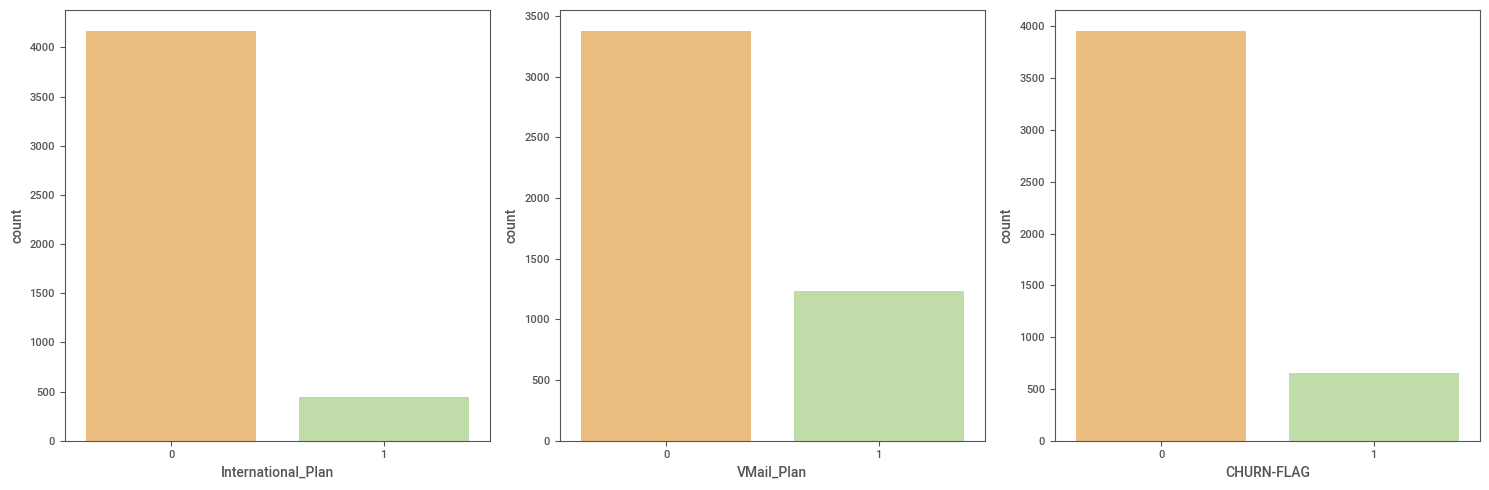

In [ ]:
cat_columns = ['International_Plan', 'VMail_Plan', 'CHURN-FLAG']

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for cat, ax in zip(cat_columns, axs.flatten()):
    sns.countplot(x=cat, data=df, ax=ax, palette='Spectral')
plt.tight_layout()

* The dataset clearly exhibits imbalance, not only in the target variable but also across independent variables. The frequency distribution highlights a significant class imbalance, with the "no" category substantially outnumbering the "yes" category.

* The presence or absence of an international plan might be a key feature for predicting customer churn, as it could reflect differing levels of engagement with the telecom provider’s services.

* Specifically, there are 3,381 customers without a voicemail plan compared to just 1,236 with one, indicating that nearly 74% of customers lack a voicemail plan.

* Similarly, in the "churn" column, there are 3,961 instances of "False," representing approximately 85% of customers who did not churn. Conversely, there are 656 instances of "True," indicating that around 14% of customers did churn.

### Bivariate Analysis

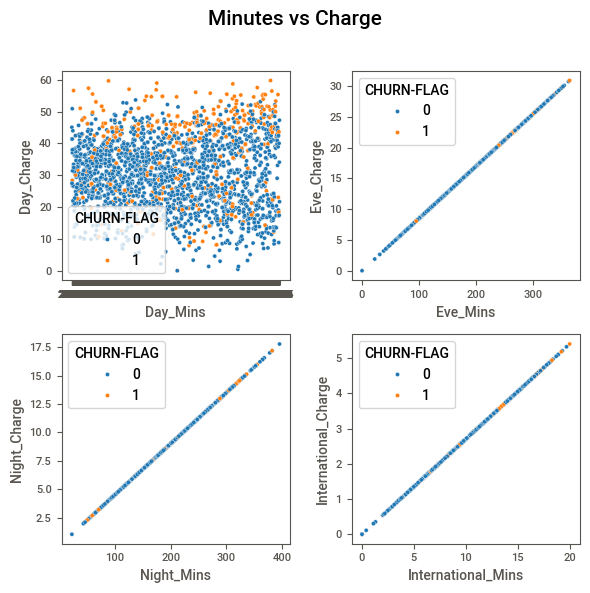

In [ ]:
types = ['Day', 'Eve', 'Night', 'International']

fig, ax = plt.subplots(2, 2, figsize=(6, 6))

for type, ax in zip(types, ax.flatten()):
    sns.scatterplot(
        x=f'{type}_Mins',
        y=f'{type}_Charge',
        data=df,
        ax=ax,
        hue='CHURN-FLAG',
        palette=['#1f77b4', '#ff7f0e']
    )

plt.suptitle('Minutes vs Charge', fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for suptitle

* It is evident that as talking minutes increase, so do the charges, with a strong correlation between these features for each type (evening, night, international).


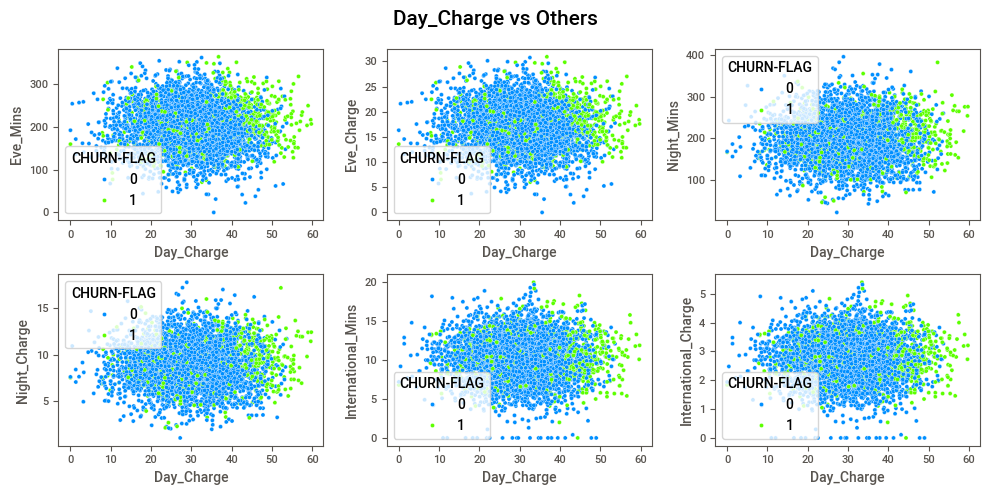

In [ ]:
relations=['Eve_Mins', 'Eve_Charge', 'Night_Mins', 'Night_Charge', 'International_Mins', 'International_Charge']

fig, ax = plt.subplots(2,3, figsize=(10,5))
for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='Day_Charge', y=relation, data=df, ax=ax, palette='gist_rainbow_r', hue="CHURN-FLAG");
plt.suptitle('Day_Charge vs Others', fontsize=15, fontweight='bold')
plt.tight_layout()

* From the scatterplots, the color differentiation reveals that green dots are concentrated on the right side of the plots.
* This indicates that customers who switched to competitors spent more time on calls during the daytime and, consequently, incurred higher daytime charges. These scatterplots suggest that daytime charges may be a significant factor contributing to customer churn.

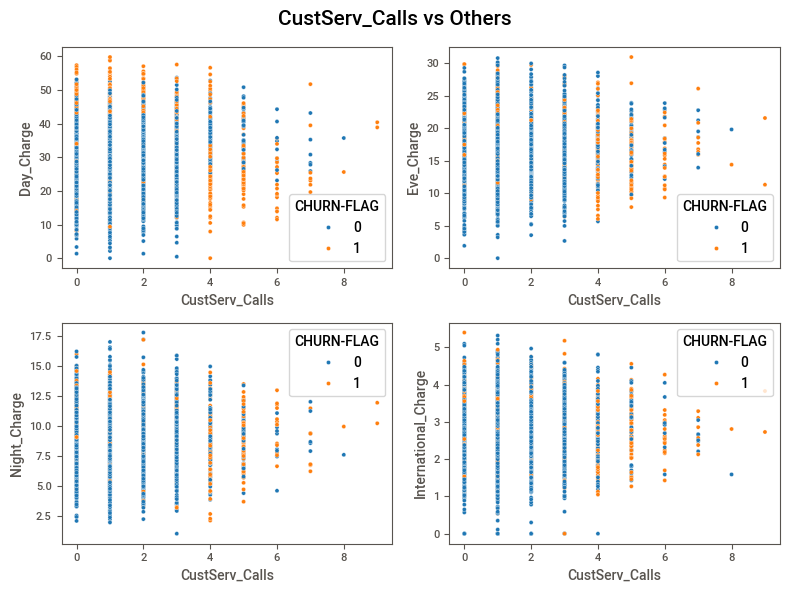

In [ ]:
relations=['Day_Charge', 'Eve_Charge', 'Night_Charge', 'International_Charge']

fig, ax = plt.subplots(2,2, figsize=(8,6))

for relation, ax in zip(relations, ax.flatten()):
        sns.scatterplot(x='CustServ_Calls', y=relation, data=df, ax=ax, hue="CHURN-FLAG", palette=['#1f77b4', '#ff7f0e']);

plt.suptitle('CustServ_Calls vs Others', fontsize=15, fontweight='bold')
plt.tight_layout()

* In the scatterplots, orange dots are concentrated in areas where customers made a higher number of customer service calls.
* This indicates that customers who made four or more calls were more likely to churn.
* Additionally, the first graph shows that daytime charges also play a role in customer churn, as evidenced by the orange dots being clustered towards the top side of the plot.
* Similarly, green dots, representing churned customers, are also concentrated on the side with a higher number of customer service calls and higher daytime charges.

###### Top States where customer churned the most

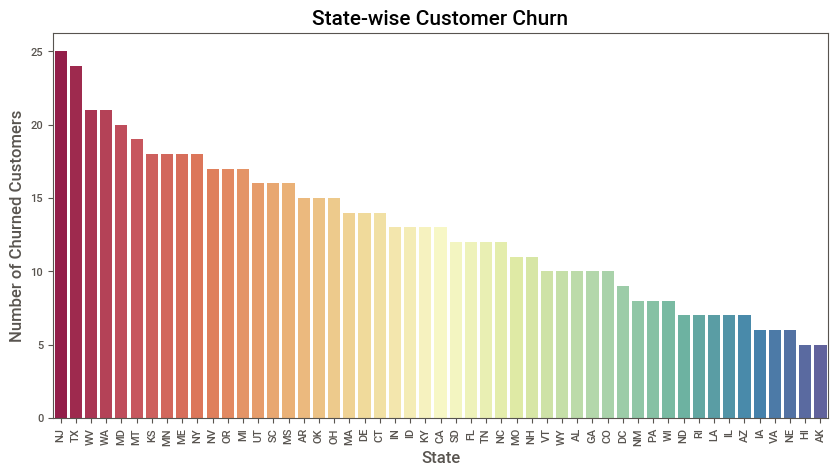

In [ ]:
# Group by 'State' and count the number of churned customers
churned = df[df['CHURN-FLAG'] == 1].groupby('State')['Area_Code'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=churned.index, y=churned.values, palette='Spectral')  # Use index for x-axis and values for y-axis
plt.xticks(rotation=90)
plt.title('State-wise Customer Churn', fontsize=15, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Churned Customers', fontsize=12)
plt.show()


##### * The number of churned customers differs across various states, ranging from a high of 25 to a low of 5.
* The top 5 states with the most customer churn include NJ, TX, and MD, each with 25 churned customers, followed by MN, WV, and WA, each with 18 churned customers.
* On the lower end, the states with the fewest churned customers are HI and AK, each with only 5 churned customers.

It would be insightful to compare the number of churned customers in each state to the total number of customers in that state, providing a churn rate for each state. This metric could better highlight problem areas. For instance, if a state has a high churn rate despite a low number of churned customers, it could suggest that the state has a large customer base, making the issue more significant than it might initially seem.

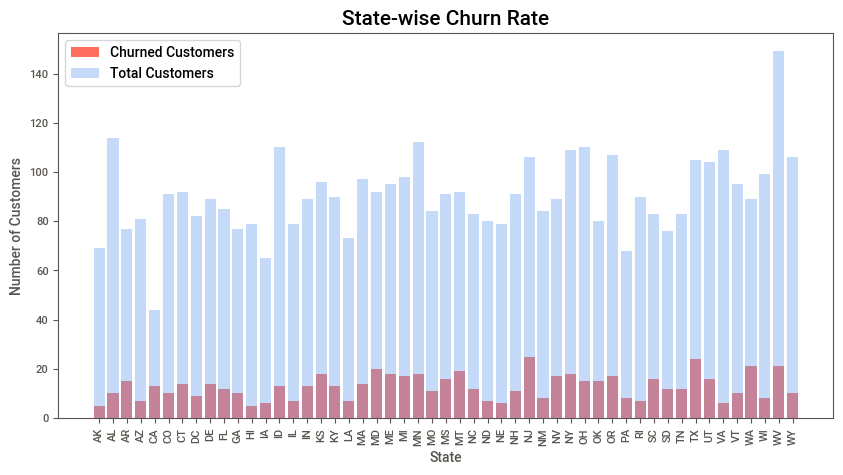

In [ ]:
# Calculate the churn rate for each state
churn_rate = df.groupby('State')['CHURN-FLAG'].mean()

# Total number of customers for each state
total_customers = df['State'].value_counts()

# Churned customers for each state
churned_customers = churn_rate * total_customers

# Bar plot for churned customers and total customers by state with a new color scheme
plt.figure(figsize=(10, 5))
plt.bar(churned_customers.index, churned_customers.values, label='Churned Customers', color='#ff6f61')  # Coral color for churned customers
plt.bar(total_customers.index, total_customers.values, alpha=0.4, label='Total Customers', color='#6fa3ef')  # Light blue color for total customers
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.legend()
plt.xticks(rotation=90)
plt.title('State-wise Churn Rate', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
print(churn_rate[churn_rate>0.20])
print('------------')
print(churn_rate[churn_rate<0.08])

State
CA    0.295455
MD    0.217391
MT    0.206522
NJ    0.235849
TX    0.228571
WA    0.235955
Name: CHURN-FLAG, dtype: float64
------------
State
AK    0.072464
HI    0.063291
NE    0.075949
RI    0.077778
VA    0.055046
Name: CHURN-FLAG, dtype: float64


1.CA has the highest churn rate, with resulting in approximately 30.0 churn.WA follows with the second-highest churn rate, NJ ranks third, with 23.58% churn rate.
2. On the other end, AK,HI,NE,RI,VA  corresponds to churn rates of less than 8%
3. Interestingly, there doesn't appear to be a direct correlation between the number of customers in a state and the churn rate.

##### Multivariate Analysis

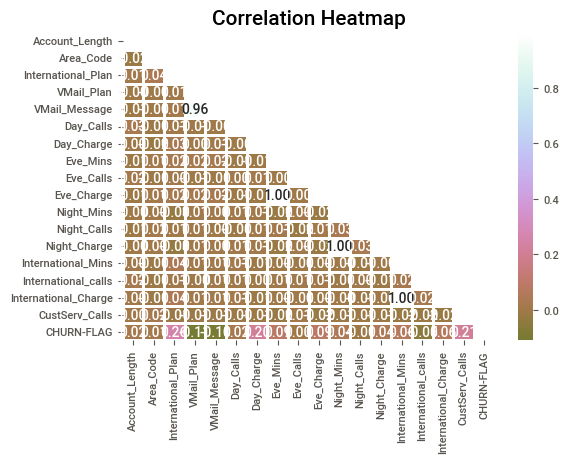

In [ ]:
# Select only numerical columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, mask=mask, center=0, cmap='cubehelix', linewidths=1, annot=True, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold')
plt.show()


From your heatmap, here are some observations:

* VMail_Message and VMail_Plan have a very high positive correlation of 0.96, suggesting that when a customer has a voicemail plan, they tend to have a high number of voicemail messages.

* The Day_Mins, Day_Calls, and Day_Charge are perfectly correlated (1 or very close to 1 with each other) as expected since charges are usually calculated based on the number of minutes and calls.

* Similarly, Eve_Mins, Eve_Calls, and Eve_Charge; Night_Mins, Night_Calls, and Night_Charge; and International_Mins, International_calls, and International_Charge show very high correlations for the same reasons.

* CHURN-FLAG, which appears to be our target variable, shows a moderately negative correlation with VMail_Plan (-0.1) and a moderate positive correlation with CustServ_Calls (0.2), suggesting these features might have some predictive power regarding customer churn.

* These correlations are valuable for identifying relationships and potential collinearities between variables, which can be particularly important in predictive modeling tasks like the one you're working on.



#### Preprocessing

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

Series([], dtype: int64)


In [ ]:
duplicates=df.duplicated()
print(duplicates.nunique())

1


* Above reflects that no missing values or no duplicates to handle
* Outlier finding

* Outliers

In [ ]:
df.columns.tolist()

['State',
 'Account_Length',
 'Area_Code',
 'Phone',
 'International_Plan',
 'VMail_Plan',
 'VMail_Message',
 'Day_Mins',
 'Day_Calls',
 'Day_Charge',
 'Eve_Mins',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Mins',
 'Night_Calls',
 'Night_Charge',
 'International_Mins',
 'International_calls',
 'International_Charge',
 'CustServ_Calls',
 'CHURN-FLAG']

In [ ]:
columns_drop=['State',
 'Area_Code',
 'Phone',
 'International_Plan',
 'VMail_Plan',
 'CHURN-FLAG']

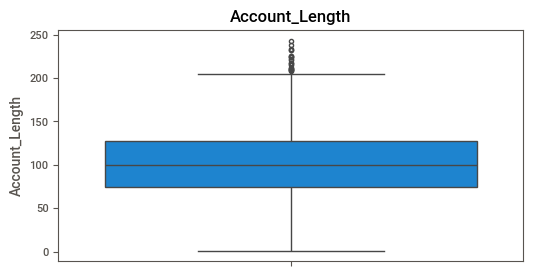

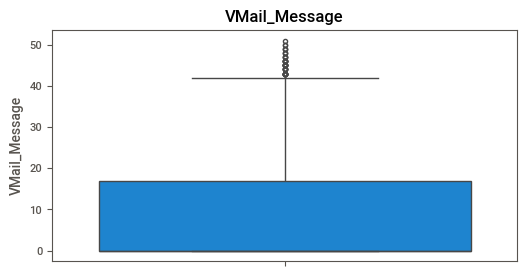

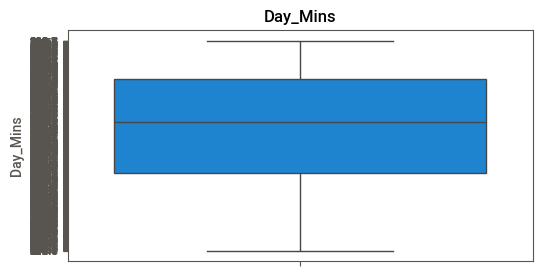

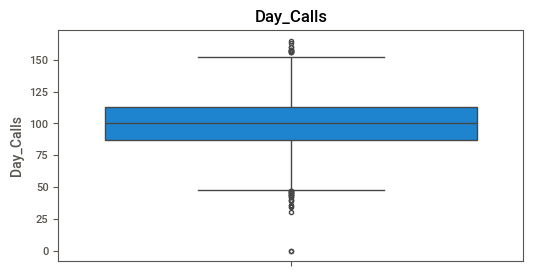

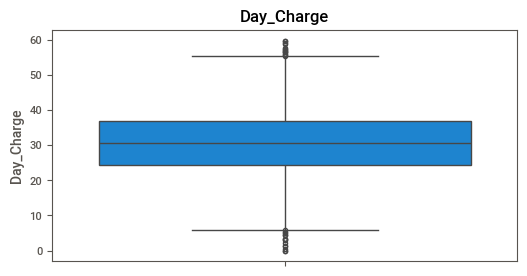

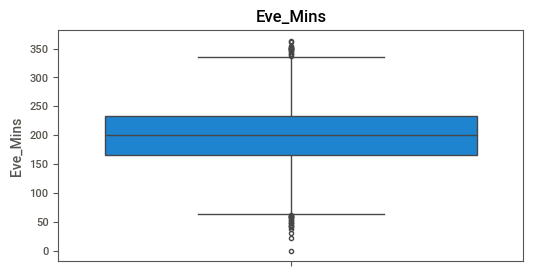

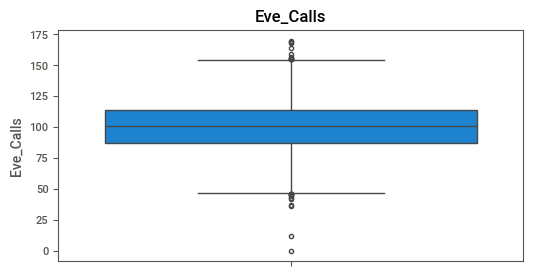

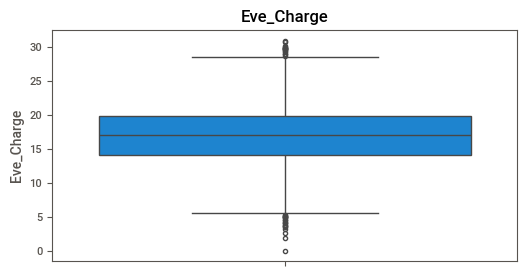

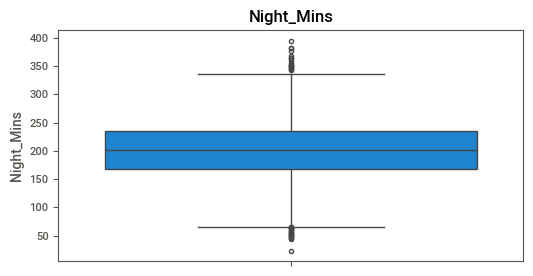

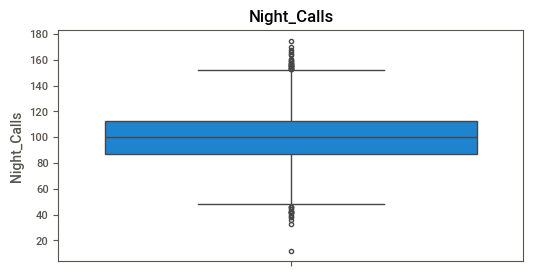

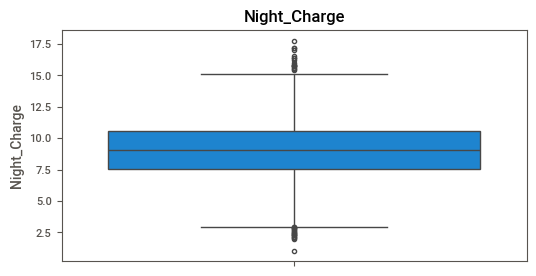

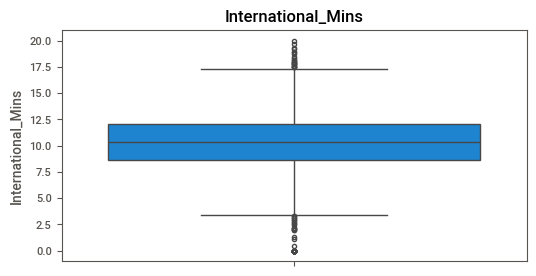

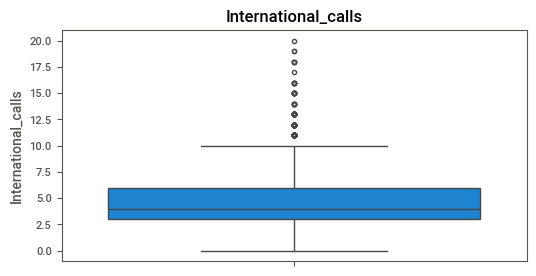

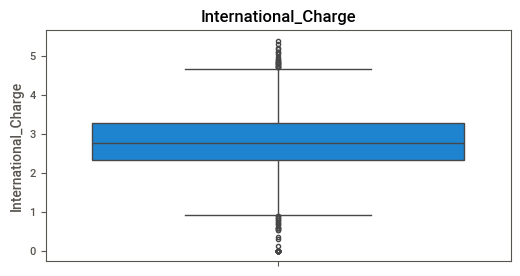

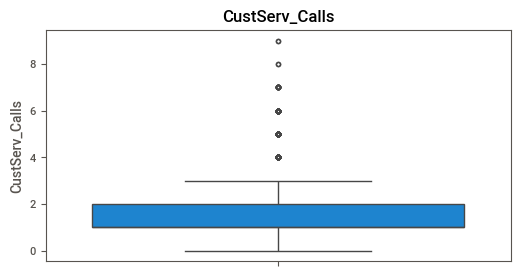

In [ ]:
# Box plots to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.drop(columns=columns_drop):
    plt.figure(figsize=(6,3))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

* no need to apply outlier detection techniques for outliers in binary feature
* here we are not find to handle outliers in
   CHURN-FLAG,International_plan,Vmail_plan (binary features)

outliers to handle
1. CustService_Calls
2. International_Charge
3. International_calls
4. International_Mins
5. Eve_Calls
6. Day_Calls
7. VMail_Message

In [ ]:
outlier_columns=['CustServ_Calls','International_Charge','International_calls','International_Mins','Eve_Calls','Day_Calls','VMail_Message']

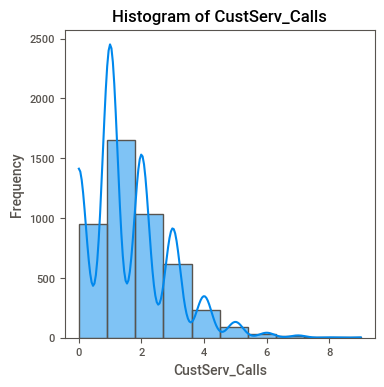

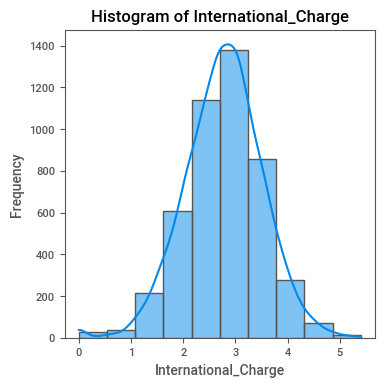

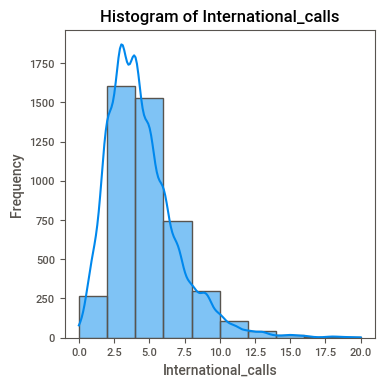

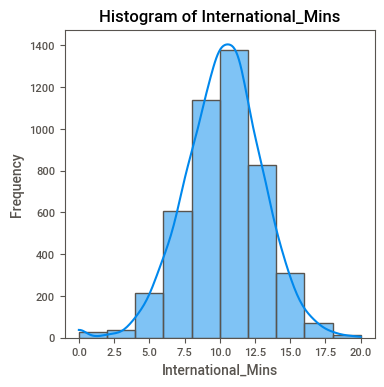

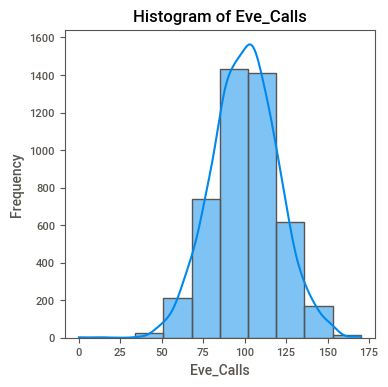

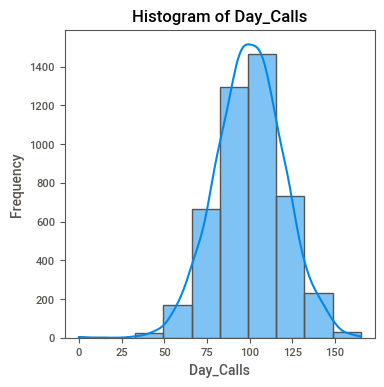

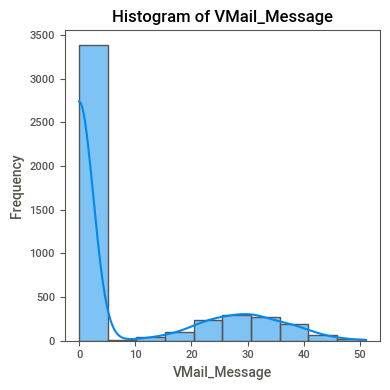

In [ ]:
import matplotlib.pyplot as plt
for column in  outlier_columns:
    plt.subplots(figsize=(4,4))  # Adjust size as needed
    sns.histplot(df[column], kde=True,bins=10)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()  # Adjusts layout to fit subplots neatly
plt.show()


In [ ]:
df.dtypes

State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_Plan        int64
VMail_Plan                int64
VMail_Message             int64
Day_Mins                 object
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_calls       int64
International_Charge    float64
CustServ_Calls            int64
CHURN-FLAG                int64
dtype: object

In [ ]:
df_outlier_columns = df[outlier_columns]

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the selected columns
Q1 = df_outlier_columns.quantile(0.25)
Q3 = df_outlier_columns.quantile(0.75)

In [ ]:
# Calculate IQR for the selected columns
IQR = Q3 - Q1

In [ ]:
print("Q1 (25th Percentile) for selected columns:")
print(Q1)

print("\nQ3 (75th Percentile) for selected columns:")
print(Q3)

print("\nIQR (Interquartile Range) for selected columns:")
print(IQR)

Q1 (25th Percentile) for selected columns:
CustServ_Calls           1.00
International_Charge     2.32
International_calls      3.00
International_Mins       8.60
Eve_Calls               87.00
Day_Calls               87.00
VMail_Message            0.00
Name: 0.25, dtype: float64

Q3 (75th Percentile) for selected columns:
CustServ_Calls            2.00
International_Charge      3.27
International_calls       6.00
International_Mins       12.10
Eve_Calls               114.00
Day_Calls               113.00
VMail_Message            17.00
Name: 0.75, dtype: float64

IQR (Interquartile Range) for selected columns:
CustServ_Calls           1.00
International_Charge     0.95
International_calls      3.00
International_Mins       3.50
Eve_Calls               27.00
Day_Calls               26.00
VMail_Message           17.00
dtype: float64


In [ ]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
df.dtypes

State                    object
Account_Length            int64
Area_Code                 int64
Phone                    object
International_Plan        int64
VMail_Plan                int64
VMail_Message             int64
Day_Mins                 object
Day_Calls                 int64
Day_Charge              float64
Eve_Mins                float64
Eve_Calls                 int64
Eve_Charge              float64
Night_Mins              float64
Night_Calls               int64
Night_Charge            float64
International_Mins      float64
International_calls       int64
International_Charge    float64
CustServ_Calls            int64
CHURN-FLAG                int64
dtype: object

Relevance of Area Code: Area codes can provide useful geographical information without revealing sensitive details.
They can help identify regional trends or market conditions that might influence churn.
Phone Number Specificity: Phone numbers themselves may not provide additional value beyond what can be inferred from the area code.
so when we splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['CHURN-FLAG','Phone'], axis=1)
y = df['CHURN-FLAG']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data size: {X_train.shape[0]}')
print(f'Testing data size: {X_test.shape[0]}')

Training data size: 3231
Testing data size: 1386


In [ ]:
print(y_train.unique())

[0 1]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
# Label encode categorical features
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Model Development

 **Random Forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60,random_state=40)
model.fit(X_train_resampled, y_train_resampled )

RandomForestClassifier(n_estimators=60, random_state=40)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8997113997113997
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1190
           1       0.68      0.55      0.61       196

    accuracy                           0.90      1386
   macro avg       0.80      0.75      0.78      1386
weighted avg       0.89      0.90      0.90      1386



**SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_resampled, y_train_resampled )

SVC()

In [ ]:
# Make predictions on the test data
y_pred2 = svm.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy_SVM = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy_SVM}')

# Detailed classification report
print(classification_report(y_test, y_pred2))

Accuracy: 0.689033189033189
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1190
           1       0.09      0.13      0.11       196

    accuracy                           0.69      1386
   macro avg       0.47      0.46      0.46      1386
weighted avg       0.74      0.69      0.71      1386



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_resampled, y_train_resampled )

DecisionTreeClassifier()

In [ ]:
y_pred1 = DT.predict(X_test)
# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy_DT = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy_DT}')

# Detailed classification report
print(classification_report(y_test, y_pred1))

Accuracy: 0.7380952380952381
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1190
           1       0.31      0.71      0.43       196

    accuracy                           0.74      1386
   macro avg       0.63      0.73      0.63      1386
weighted avg       0.85      0.74      0.77      1386



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNC=KNeighborsClassifier()
KNC.fit(X_train_resampled, y_train_resampled )

KNeighborsClassifier()

In [ ]:
y_pred_3=KNC.predict(X_test)
# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy_KNC = accuracy_score(y_test, y_pred_3)
print(f'Accuracy: {accuracy_KNC}')

# Detailed classification report
print(classification_report(y_test, y_pred_3))


Accuracy: 0.5173160173160173
              precision    recall  f1-score   support

           0       0.84      0.54      0.66      1190
           1       0.12      0.38      0.18       196

    accuracy                           0.52      1386
   macro avg       0.48      0.46      0.42      1386
weighted avg       0.74      0.52      0.59      1386



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(X_train_resampled, y_train_resampled )

GradientBoostingClassifier()

In [ ]:
GB_Predict=GB.predict(X_test)
# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy_GB = accuracy_score(y_test,GB_Predict)
print(f'Accuracy: {accuracy_GB}')

Accuracy: 0.9047619047619048


In [ ]:
from sklearn.neural_network import MLPClassifier
MLP=MLPClassifier()
MLP.fit(X_train_resampled, y_train_resampled )

MLPClassifier()

In [ ]:
MLP_predict=MLP.predict(X_test)
# Evaluate the model's performance
from sklearn.metrics import make_scorer, roc_auc_score, auc, precision_score, recall_score, classification_report, roc_curve, accuracy_score, f1_score
accuracy_MLP = accuracy_score(y_test,MLP_predict)
print(f'Accuracy: {accuracy_MLP}')

Accuracy: 0.7359307359307359


### Challenges

#### Imbalanced Dataset:
A key challenge in this project was managing an imbalanced dataset, where the number of churned customers was significantly lower than that of non-churned customers. This imbalance can lead to skewed model predictions and difficulties in accurately detecting churn cases. To address this, we employed over-sampling techniques and focused on using suitable evaluation metrics, such as the F1-score, to ensure the model effectively identified churn instances.


#### Business Context and Constraints:
Understanding No-Churn Telecom's specific business context and constraints was vital for developing a practical churn prediction solution. This involved integrating domain knowledge, considering business objectives, and aligning the model’s outputs with actionable strategies and decision-making processes. Collaborating closely with project mentors and subject matter experts was crucial in overcoming these challenges and ensuring the model's relevance and effectiveness in addressing customer churn.

By addressing these challenges, we successfully developed a robust churn prediction model that offered valuable insights and actionable recommendations for No-Churn Telecom, aiding them in effectively managing and reducing customer churn.